# Moringa School Week 9 Independent Project(KNN)

# Defining the Question

**1.   Specifying the Question**

Predicting whether someone survived or did not survive using the titanic dataset.

**2.   Defining the Metric for Success**

f_1 score and accuracy will be the two many attributes that we shall use to check on the accuracy of the models we shall develop.

**3.   Understanding the context**

The aim of this project is to use the dataset provided; the titanic dataset, to predict whether someone survived or not.

**4.   Recording the experimental Design**

*   Data reading and checking
*   Data tidying 
*   Data Exploration
*   Implementing the solution 
*   Modelling 
*   Challenging the solution
*   Follow Up question
*   Conclusion

**5. Data Relevance**

The data provided has the relevant features needed to carry out the project. 

# Reading the Data

In [ ]:
#Libraries
#

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading and previewing the train dataset
#
df1 = pd.read_csv('train (5).csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Loading and previewing the train dataset
#
df2 = pd.read_csv('test (1).csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Checking the Data

In [ ]:
#Shape of df1 -train 

df1.shape


(891, 12)

In [ ]:
#shape of df2 -test

df2.shape

(418, 11)

Train Dataset 

In [ ]:
# Previewing the top of our dataset
#

df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the bottom of our dataset
# 

df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Checking the datatype 
#

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Test Dataset 

In [ ]:
#
# Previewing the top of our dataset
#

df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Previewing the bottom of our dataset
# 

df2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#Checking the datatype 
#

df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# External Data Source Validation

The dataset was validated by a viable external source; https://www.kaggle.com/c/titanic/data

Kaggle is a trusted data source for many data scientist.

# Tidying the Dataset 

Train Dataset 

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Identifying the Missing Data
#

df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are a lot of missing values on the Age and Cabin column, dropping them would affect the quality of our data. We are going to replace them with the mean and drop the cabin column. 


In [ ]:
#Replacing the age column missing values will the median
#

df1['Age'] = df1['Age'].fillna(df1['Age'].median())


In [ ]:
#Dropping the cabin column
df1.drop(['Cabin'], axis = 1, inplace = True)

In [ ]:
#Dropping the 2 missing values on the embarked column
#

df1.dropna (inplace =True)

In [ ]:
#Checking if we have no missing values 
#

df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Checking for duplicates 
#

df1.duplicated().sum()

0

In [ ]:
# Checking for Anomalies
#

for column in df1.columns:
  print("***************************", column, "********************************")
  print("This column has", df1[column].nunique(), "unique values, they are shown below:\n")
  print(df1[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** PassengerId ********************************
This column has 889 unique values, they are shown below:

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 2

Our dataset has no anomalies.

In [ ]:
#Checking on the datatype
#

df1.info()

#I shall deal with the data types during feature engineering

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
#Checking if columns are named appropriately
#

df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

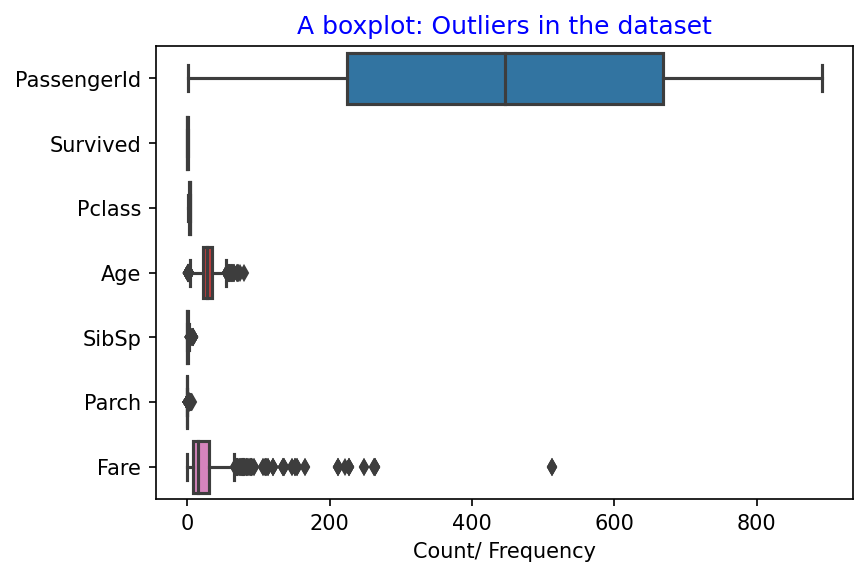

In [ ]:
# check for outliers

colm = df1[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]
# np.asarray(colu).reshape()
# check for outliers
plt.figure(dpi = 150)
ax = sns.boxplot(data = colm , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

In [ ]:
#***
#The Age and fare column have outliers
#Lets trying dealing with them by scaling these columns
#

df1['Age1'] = [np.log(x) for x in df1['Age']]


In [ ]:
#*******
dfa = df1['Age']

from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()

scaling.fit_transform(dfa)

In [ ]:
df1.boxplot(column = ['Age'], grid = False)

Test Dataset 

In [ ]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Identifying the Missing Data
#

df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are a lot of missing values on the Age and Cabin column, dropping them would affect the quality of our data. We are going to replace them with the mean and drop the cabin column. 

In [ ]:
#Replacing the age column missing values will the median
#

df2['Age'] = df2['Age'].fillna(df2['Age'].median())

In [ ]:
#Dropping the cabin column
df2.drop(['Cabin'], axis = 1, inplace = True)

In [ ]:
#Dropping the 2 missing values on the embarked column
#

df2.dropna (inplace =True)

In [ ]:
#Checking if we have no missing values 
#

df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Checking for duplicates 
#

df2.duplicated().sum()

0

In [ ]:
# Checking for Anomalies
#

for column in df2.columns:
  print("***************************", column, "********************************")
  print("This column has", df2[column].nunique(), "unique values, they are shown below:\n")
  print(df2[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** PassengerId ********************************
This column has 417 unique values, they are shown below:

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1045 1046
 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060
 1061 1062 1063 1

In [ ]:
#Checking on the datatype
#

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [ ]:
#Checking if columns are named appropriately
#

df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

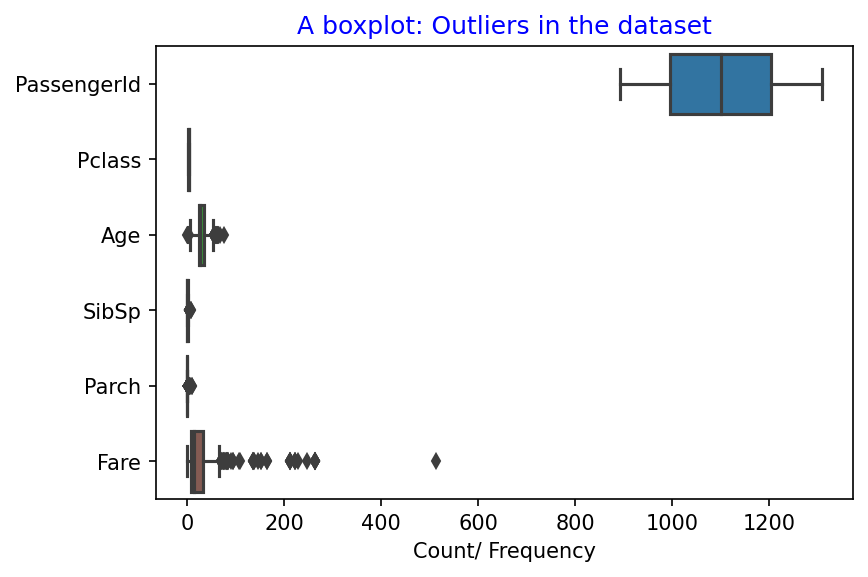

In [ ]:
# check for outliers

colm = df2[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked']]
# np.asarray(colu).reshape()
# check for outliers
plt.figure(dpi = 150)
ax = sns.boxplot(data = colm , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

# Exploratory Analysis

In [ ]:
df1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Feature Engineering

In [ ]:
#Encoding the sex and Embarked column
#

df1['Sex'] = np.where(df1['Sex'] == 'male', 1, 0)
df1['Embarked'] = np.where(df1['Embarked'] == 'male', 1, 0)


df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [ ]:
#Dropping columns with text
#

df1.drop(['Name', 'Ticket'], axis = 1, inplace = True)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


The dataset is now ready for feature selection. 

**Multivariate Analysis**

In [ ]:
#Additional Libraries 
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
X = df1.iloc[ :, 2:8]
y = df1.iloc[ :, 1]

def Factor(X, y, n, d):
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


   sc = StandardScaler()
   X_train = sc.fit_transform(X_train)
   X_test = sc.transform(X_test)

   lda = LDA(n_components=n)
   X_train = lda.fit_transform(X_train, y_train)
   X_test = lda.transform(X_test)

   classifier = RandomForestClassifier(max_depth=d, random_state=0)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)

   a = accuracy_score(y_test, y_pred)
   print('Accuracy: ' + str(a))
   def coe():
# Create an LDA object
    lda = LDA(n_components = n)
    x = lda.fit(X, y)
    model = x.transform(X)
    coeff = pd.DataFrame(index = X.columns.values, data=x.coef_[0].T)
    print(coeff.sort_values(0, ascending=True))
   coe()

In [ ]:
#X,y,n,d
# n = components
# d = depth

Factor(X, y, 1, 1)

Accuracy: 0.7359550561797753
               0
Sex    -3.558002
Pclass -1.186136
SibSp  -0.303042
Parch  -0.131327
Age    -0.040938
Fare    0.002851


In [ ]:
Factor(X, y, 2, 1)

Accuracy: 0.7359550561797753
               0
Sex    -3.558002
Pclass -1.186136
SibSp  -0.303042
Parch  -0.131327
Age    -0.040938
Fare    0.002851


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(6, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(6, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > m

Despite playing around with the n, our accuracy was still at 0.7359550561797753; which is good enough. We are going to use the three strongest features in our model. 

In [ ]:
#Our new dataset
#

Final = df1[['Sex', 'Pclass', 'SibSp', 'Survived']]
Final.head()

,Sex,Pclass,SibSp,Survived
0,male,3,1,0
1,female,1,1,1
2,female,3,0,1
3,female,1,1,1
4,male,3,0,0


**Bivariate Analysis**

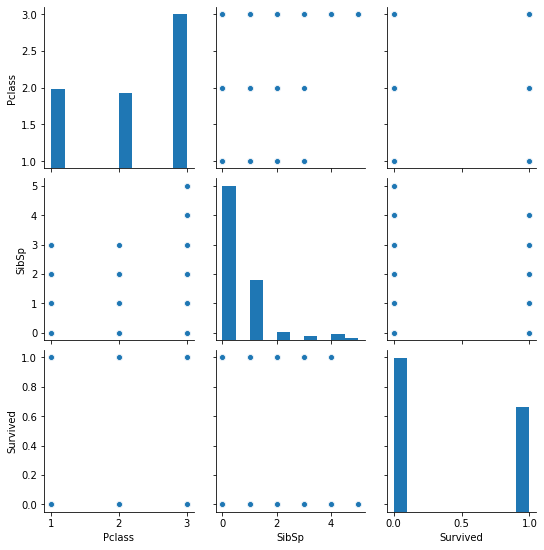

In [ ]:
#Bivariate Summary 
#

sns.pairplot(Final)
plt.show()

In [ ]:
#Correlation
#

correlation = Final.corr()
correlation

,Pclass,SibSp,Survived
Pclass,1.000000,0.065187,-0.356462
SibSp,0.065187,1.000000,-0.015523
Survived,-0.356462,-0.015523,1.000000


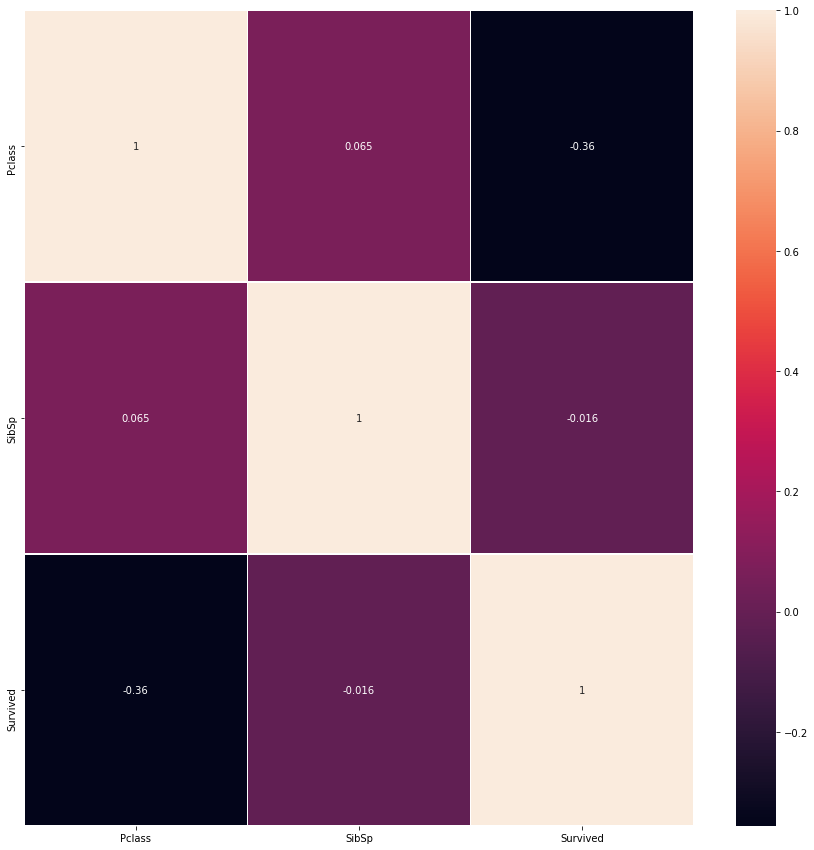

In [ ]:
#Correlation heatmap
#

fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(correlation, annot=True,  linewidths=.5, ax=ax)

# Implementing the Solution

In [ ]:
#Additional Libraries 
#

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
#Preview train 
#  

Final.head()

,Sex,Pclass,SibSp,Survived
0,1,3,1,0
1,0,1,1,1
2,0,3,0,1
3,0,1,1,1
4,1,3,0,0


Modelling

**Test Dataset**

Datasplit into 80-20

In [ ]:
#Identifying X and y and spliting the dataset 

X = Final.iloc[:, 0:2].values
y = Final.iloc[:, 3].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Feature Scaling
#

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
#Training and predicting
#

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
#

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96 20]
 [22 40]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       116
           1       0.67      0.65      0.66        62

    accuracy                           0.76       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.76      0.76      0.76       178



Test Dataset

In [ ]:
#Preview test
#

df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Test Dataset**

# Challenging the Solution

 A model had 96 and 40 correct predictions and 20 and 22 incorrect predictions. This is encouraging since we are sure that the model did not over fit. However I am worried about the huge number of incorrect predictions. 

# Follow up Questions

1.   Did we have the right data? **Yes**


2.   Do we need other data to answer our question? **No**


3.   Did we have the right question? **Yes**

# Conclusion

 A model had 96 and 40 correct predictions and 20 and 22 incorrect predictions. Which is good enough